In [22]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [23]:
city_location = {'香港':(114.17, 22.28)}

In [24]:
import re

In [25]:
pattern  = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")

In [26]:
for line in coordination_source.split('\n'):
    city_info = pattern.findall(line)
    if not city_info: continue
        
    city, long, lat = city_info[0]
    
    long, lat = float(long), float(lat)
    
    city_location[city] = (long, lat)

In [27]:
city_location

{'香港': (114.17, 22.28),
 '兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '海口': (110.35, 20.02),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '台湾': (121.3, 25.03),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '西藏': (91.11, 29.97),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '澳门': (113.54, 22.19)}

In [28]:
import math

In [33]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + 
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
        math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1- a))
    d = radius * c
    
    return d

In [34]:
def get_geo_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [169]:
get_geo_distance('乌鲁木齐', '西藏')

378.980493813608

In [36]:
import networkx as nx

In [37]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))

In [38]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt

In [57]:
import matplotlib.font_manager

In [68]:
plt.rcParams['font.sans-serif'] = ['SimHei']
# 将字体限定为 SimHei

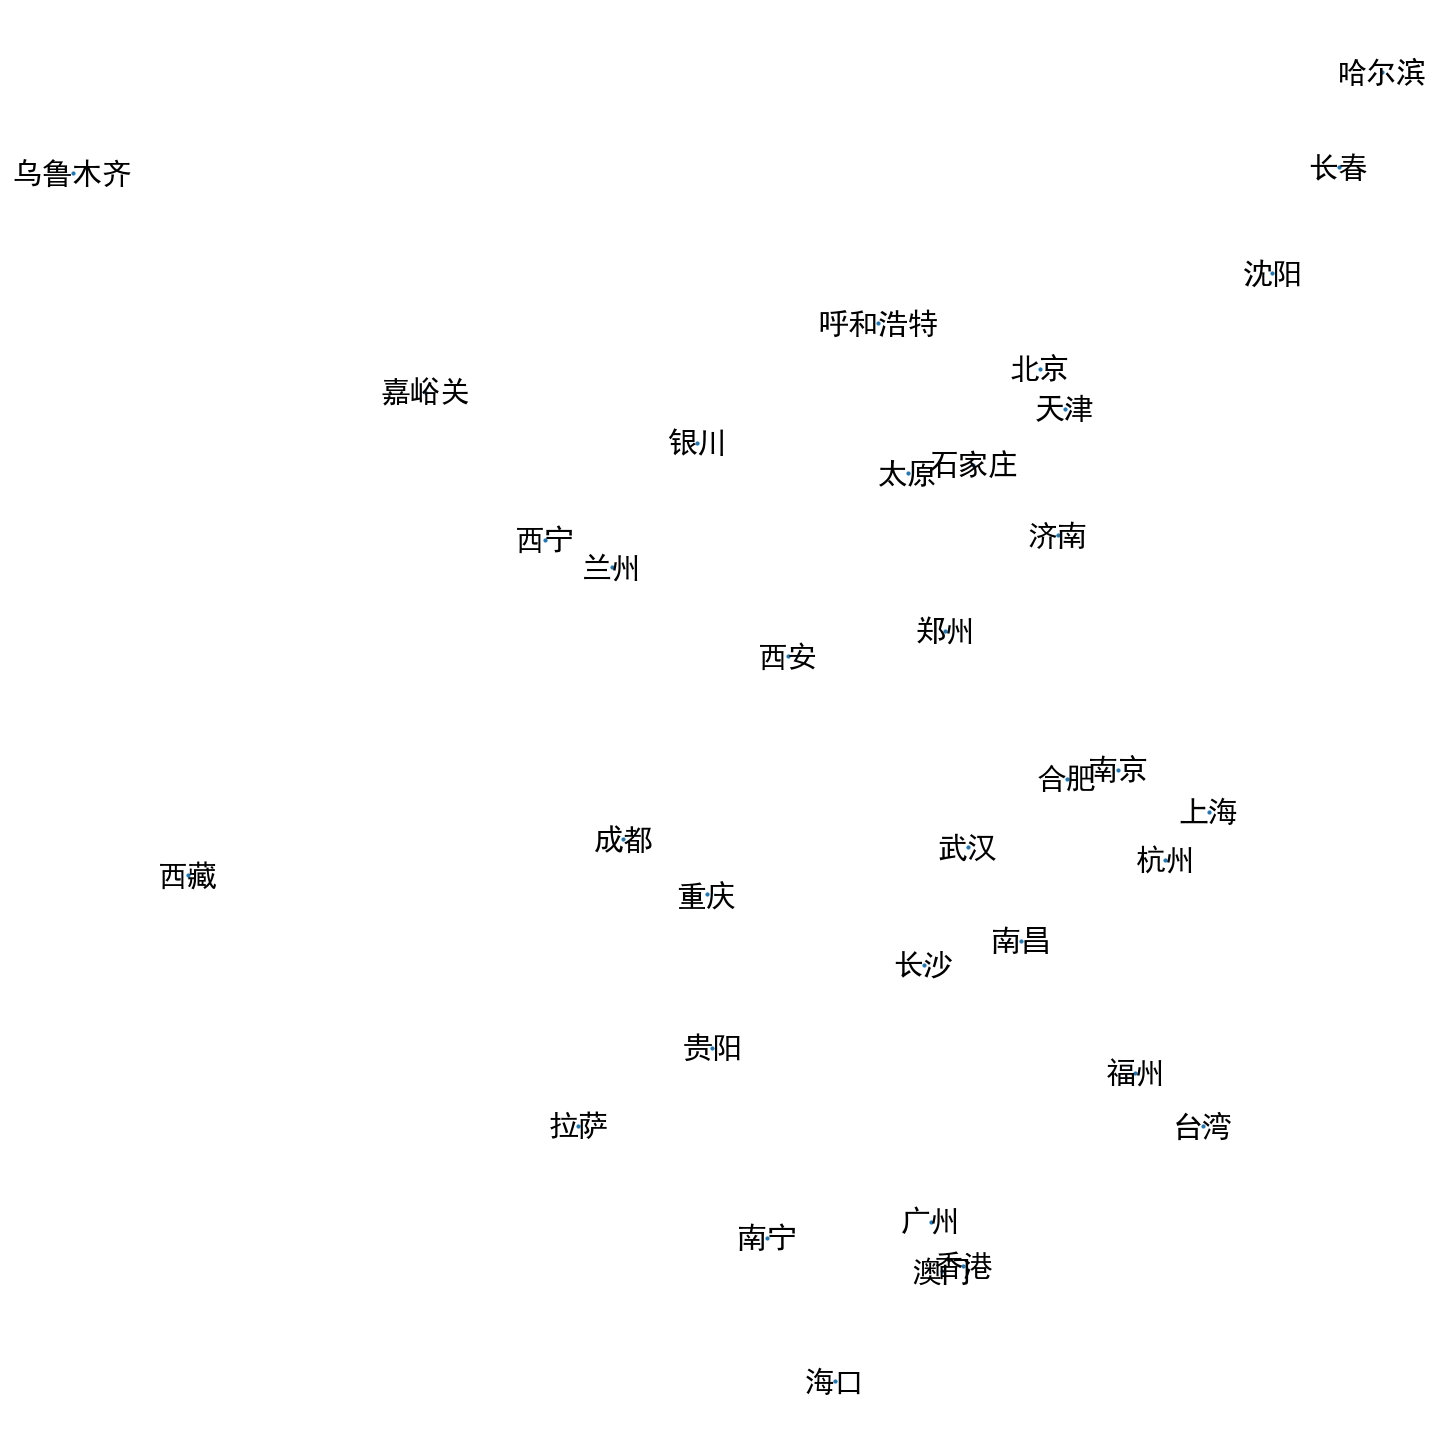

In [148]:
plt.figure(figsize = (20, 20))
nx.draw(city_graph, city_location, with_labels = True, node_size = 10, font_size = 30)

In [162]:
threshold = 1000

In [163]:
from collections import defaultdict

In [164]:
city_connection = defaultdict(list)

In [165]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2: continue
            
        distance = get_geo_distance(c1, c2)
        
        if distance < threshold:
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [166]:
city_with_road = nx.Graph(city_connection)

C:\Users\zhuxiang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


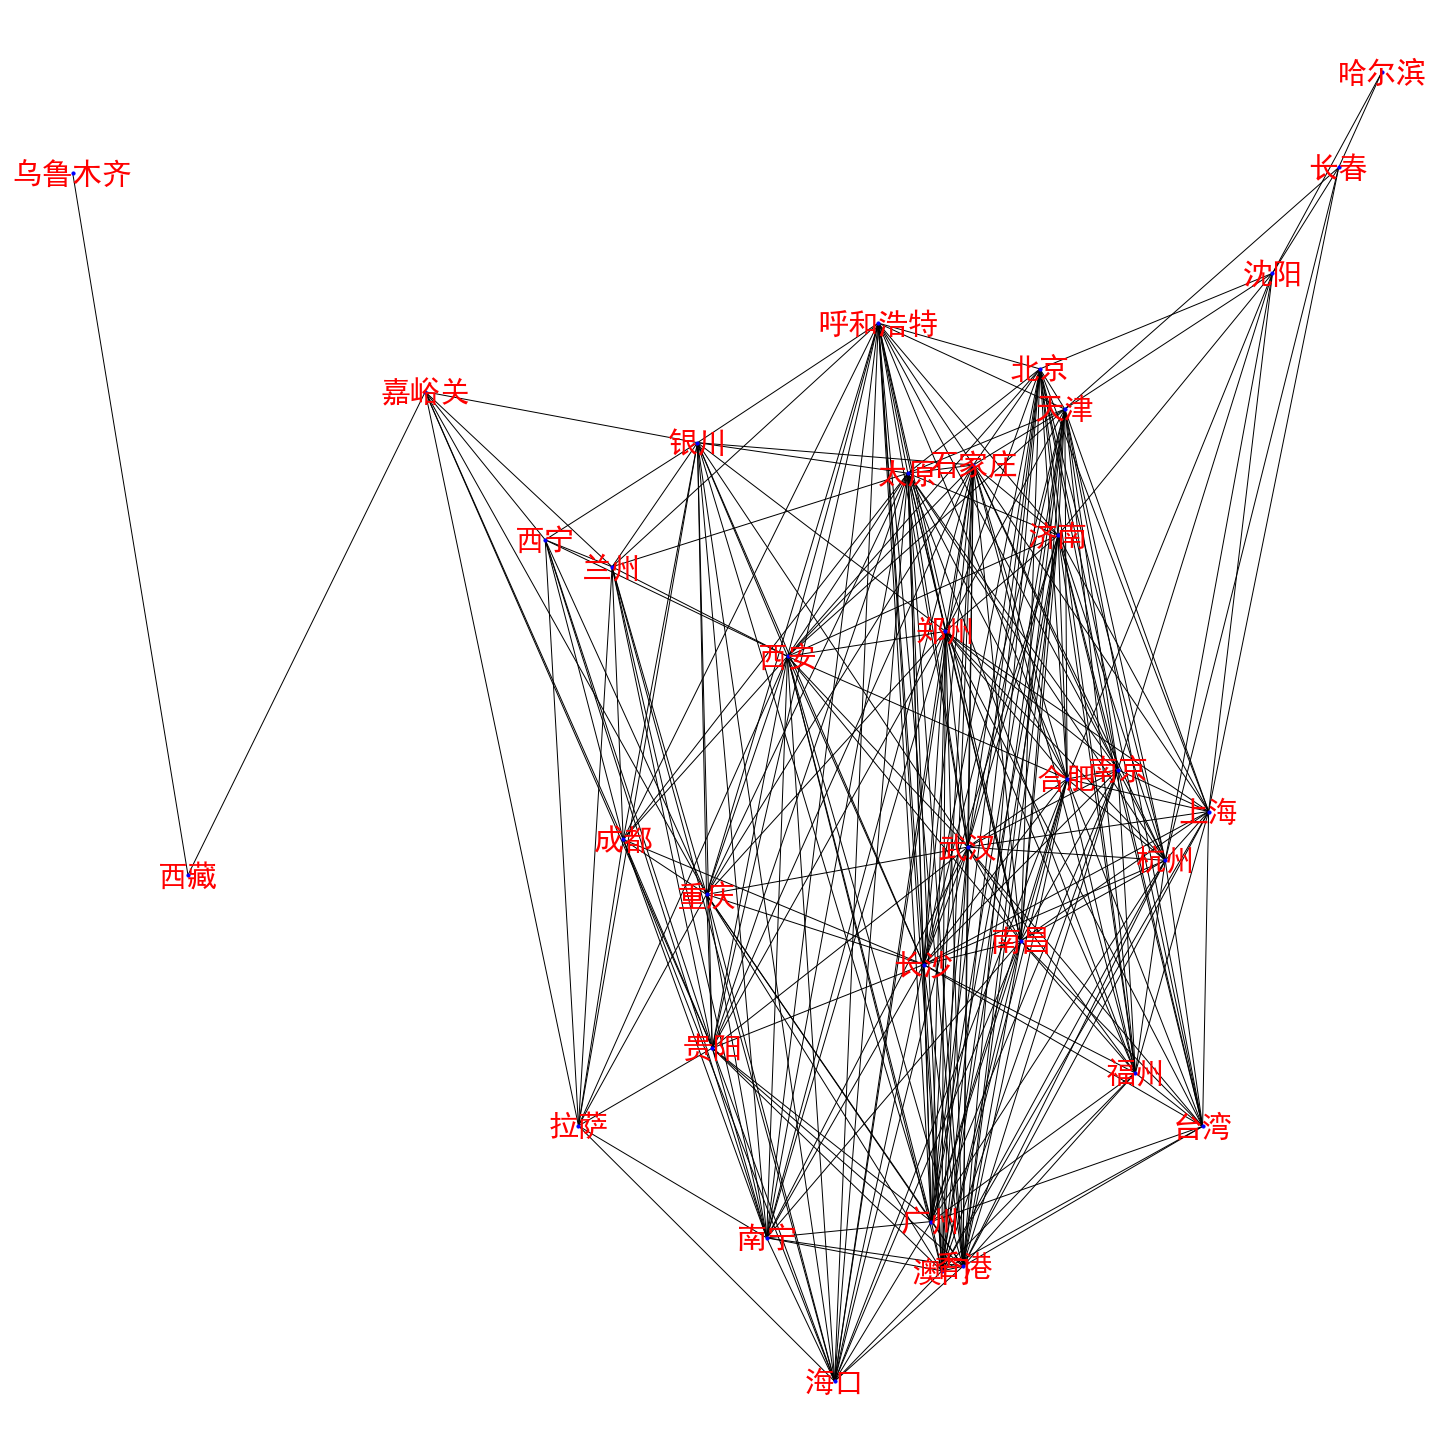

In [167]:
plt.figure(figsize = (20, 20))
nx.draw(city_with_road, city_location, with_labels = True, node_size = 10, node_color = 'blue', font_size = 30, font_color = 'red')

In [1]:
def bfs(graph, start):
#def dfs(graph, start):
    
    vistied = [start]
    
    seen = set()
    
    while visited:
        froninter = visitied.pop
        
        if froninter in senn: continue
            
        for successor in graph[froninter]:
            if successor in seen: continue
                
            print(successor)
            
            visitied = [successor] + visitied
            #visitied = visitied + [successor]
        seen.add(froninter)
        
    return seen

C:\Users\zhuxiang\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


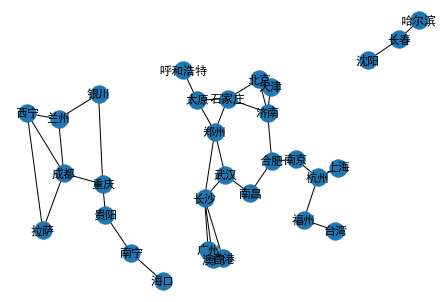

In [84]:
nx.draw(nx.Graph(city_connection), city_location, with_labels = True, node_sizes = 5)

In [95]:
def serach(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
            
        successors = connection_graph[froninter]
        
        for city in successors:
            if city in path: continue
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: return new_path
            
        visited.add(froninter)
        
        pathes = sort_candidate(pathes)

In [96]:
def transfer_stations_first(pathes):
    return sorted(pathes, key = len)

In [97]:
def transfer_as_much_possible(pathes):
    return sorted(pathes, key = len, reverse = True)

In [108]:
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)

In [109]:
serach('广州','上海', city_connection, sort_candidate = shortest_path_first)

['广州', '长沙', '武汉', '南昌', '合肥', '南京', '杭州', '上海']

# Machine Learning

In [110]:
from sklearn.datasets import load_boston

In [114]:
data = load_boston()

In [115]:
X, y = data['data'], data['target']

In [116]:
%matplotlib inline

In [117]:
import matplotlib.pyplot as plt

In [118]:
def draw_rm_and_price():
    plt.scatter(X[:,5], y)

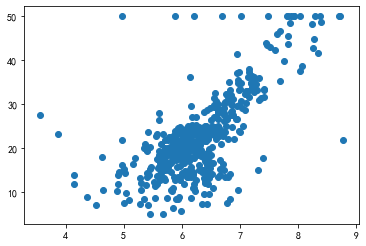

In [119]:
draw_rm_and_price()

In [120]:
import random

In [121]:
def price(rm, k, b):
    return k * rm + b

C:\Users\zhuxiang\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhuxiang\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


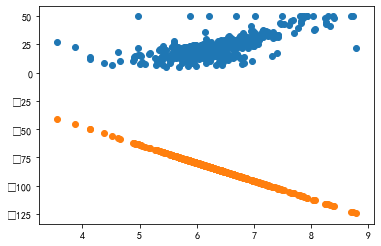

In [123]:
X_rm = X[:,5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [124]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

# Random generation: get best k and best b

In [125]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 7.725260766925942 best_b: -91.85991782162813, and the loss is: 4379.741011219787
When time is : 13, get best_k: 21.205999627410293 best_b: -53.168165332554686, and the loss is: 3430.2005177223778
When time is : 16, get best_k: 5.389660821279051 best_b: 7.85142838636979, and the loss is: 418.6728181404284
When time is : 66, get best_k: -6.399285205092582 best_b: 62.244605258927834, and the loss is: 162.24727032501926
When time is : 188, get best_k: 7.020764166954052 best_b: -17.95229832139087, and the loss is: 58.968721895402226
When time is : 189, get best_k: 11.681780840213179 best_b: -51.709995440244995, and the loss is: 47.563355667112376


# Direction Adjusting

In [133]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, +1),
    (+1, -1),
    (-1, -1),
    (-1, +1)
]

next_direction = random.choice(direction)

scalar = 0.1

update_time = 0

for i in range(trying_times):
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 9, get best_k: 65.38578436591953 best_b: -15.93175562060895, and the loss is: 140331.72189995524
When time is : 19, get best_k: 64.38578436591959 best_b: -16.931755620608964, and the loss is: 134903.33195765232
When time is : 29, get best_k: 63.3857843659196 best_b: -17.93175562060898, and the loss is: 129582.05920209667
When time is : 39, get best_k: 62.385784365919584 best_b: -18.931755620608993, and the loss is: 124367.9036332876
When time is : 49, get best_k: 61.38578436591957 best_b: -19.931755620609007, and the loss is: 119260.86525122591
When time is : 59, get best_k: 60.385784365919555 best_b: -20.93175562060902, and the loss is: 114260.94405591098
When time is : 69, get best_k: 59.38578436591954 best_b: -21.931755620609035, and the loss is: 109368.14004734323
When time is : 79, get best_k: 58.38578436591953 best_b: -22.93175562060905, and the loss is: 104582.4532255225
When time is : 89, get best_k: 57.38578436591951 best_b: -23.931755620609064, and the loss is:

# 导数

In [142]:
def partial_k(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
        
    return -2 / n * gradient

def partial_b(x, y, y_hat):
    n = len(y)
    
    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
        
    return -2 / n * gradient

In [143]:
from icecream import ic

In [144]:
trying_times = 2000

X, y = data['data'], data['target']

min_loss = float('inf')

current_k = random.random() * 200 - 100
current_b = random.random() * 200 - 100

learning_rate = 1e-04

update_time = 0

for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    
    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        
        if i % 50 == 0:
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        
        k_gradient = partial_k(X_rm, y, price_by_k_and_b)
        b_gradient = partial_b(X_rm, y, price_by_k_and_b)
        current_k = current_k + (-1 * k_gradient) * learning_rate
        current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 41404.122154221855
When time is : 50, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 18300.746066329033
When time is : 100, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 8154.962353985329
When time is : 150, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 3699.4568492443927
When time is : 200, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 1742.815730793483
When time is : 250, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 883.5415618224092
When time is : 300, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 506.1719875996745
When time is : 350, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the loss is: 340.42901820984775
When time is : 400, get best_k: 14.185784365918932 best_b: -67.13175562060945, and the 

C:\Users\zhuxiang\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\zhuxiang\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


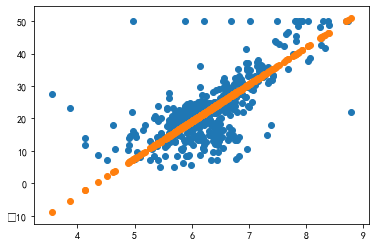

In [145]:
X_rm = X[:, 5]
k = 11.431551629413757
b = -49.52403584539048
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)